# Introdução

## Importação das bibliotecas necessarias

In [1]:
%matplotlib inline
import requests
import pandas as pd
import os
import json
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
import numpy as np
import ipywidgets as widgets
import glob, os
sns.set()

## Pegar o CSV do Indicador, Estados e Municípios

Aqui é utilizado o indicador "Proporção de nascidos vivos de mulheres com idade inferior a 20 anos (gestação na adolescência)"

In [5]:
csvs = glob.glob(os.path.join('../csv_files/*.csv'))
df_csvs = pd.DataFrame(csvs,columns=['Indicadores'])

In [6]:
indicadores = df_csvs['Indicadores'].map(lambda x: x.lstrip('./csv_files/').rstrip('.csv'))
df_indicadores = pd.DataFrame(indicadores,columns=['Indicadores'])

In [7]:
ano_esc = int( input("Diga ano que deseja visualizar: \n") )

Diga ano que deseja visualizar: 
 2013


In [8]:
indicador_select = widgets.Dropdown(
    options=df_indicadores['Indicadores'].values,
    value='Q-01-proporcao_gravidez_idade_menor_que_20',
    description='Indicadores:',
    disabled=False,
)
display(indicador_select)

Dropdown(description='Indicadores:', index=41, options=('Q-121-proporcao_nascidos_vivos_com_numero_de_consulta…

In [9]:
indicador_select.value
nome_arquivo_indicador = indicador_select.value
arquivo_indicador= df_csvs[df_csvs['Indicadores'].str.contains(indicador_select.value)]['Indicadores'].values[0]
print(arquivo_indicador)
'''
nome_estado = estados_select.value
print(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')
'''

../csv_files/QW-20-razao_mortalidade_materna.csv


"\nnome_estado = estados_select.value\nprint(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')\n"

In [11]:
df = pd.read_csv(arquivo_indicador)
df_estados = pd.read_csv('../csv_files/Estados.csv')
df_municipios = pd.read_csv('../csv_files/Municipios.csv')
df

,CODMUNRES,Ano,Qtd_Morte_Materna,Qtd_Total,Ratio
0,110000,2012,0.0,2.0,0.000000
1,110000,2013,0.0,16.0,0.000000
2,110000,2014,0.0,4.0,0.000000
3,110000,2015,0.0,4.0,0.000000
4,110000,2016,0.0,2.0,0.000000
...,...,...,...,...,...
44678,530010,2015,16.0,46122.0,34.690603
44679,530010,2016,24.0,43340.0,55.376096
44680,530010,2017,21.0,44568.0,47.119009
44681,530010,2018,24.0,44195.0,54.304786


In [12]:
coluna_codigo = df.columns[0] 
ano =           df.columns[1] 
indicador =     df.columns[2]
total =         df.columns[3]
ratio =         df.columns[4]
print(coluna_codigo,ano,indicador,total,ratio)

CODMUNRES Ano Qtd_Morte_Materna Qtd_Total Ratio


In [13]:
df_municipios[coluna_codigo] = df_municipios[coluna_codigo].astype(str)
f2d = df_municipios[coluna_codigo].str.extract('([0-9]{2})', expand=False)
df_municipios['COD_UF'] = f2d.astype(int)
df_municipios

,res_MUNNOME,CODMUNRES,COD_UF
0,Município ignorado - RO,110000,11
1,Alta Floresta D'Oeste,110001,11
2,Ariquemes,110002,11
3,Cabixi,110003,11
4,Cacoal,110004,11
...,...,...,...
5579,Vianópolis,522200,52
5580,Vicentinópolis,522205,52
5581,Vila Boa,522220,52
5582,Vila Propício,522230,52


In [14]:
estados_select = widgets.Dropdown(
    options=df_estados['res_NOME_UF'].values,
    value='MINAS GERAIS',
    description='Estados:',
    disabled=False,
)
display(estados_select)

Dropdown(description='Estados:', index=16, options=('RONDONIA', 'ACRE', 'AMAZONAS', 'RORAIMA', 'PARA', 'AMAPA'…

In [15]:
nome_estado = estados_select.value
print(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')

5594 Municípios registrados no país


In [16]:
anos = [2012,2013,2014,2015,2016,2017,2018,2019]
print(anos)

for i in anos:
    aux = df[df[ano]==i]
    aux1 = aux[aux[total]<100]
    print('Ano: ',i,' Municipios com menos de 100 registros no total: ', aux1.shape[0])

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Ano:  2012  Municipios com menos de 100 registros no total:  2130
Ano:  2013  Municipios com menos de 100 registros no total:  2181
Ano:  2014  Municipios com menos de 100 registros no total:  2120
Ano:  2015  Municipios com menos de 100 registros no total:  2137
Ano:  2016  Municipios com menos de 100 registros no total:  2212
Ano:  2017  Municipios com menos de 100 registros no total:  2151
Ano:  2018  Municipios com menos de 100 registros no total:  2134
Ano:  2019  Municipios com menos de 100 registros no total:  2173


In [17]:
uf_selecionada = df_estados[df_estados['res_NOME_UF']==estados_select.value]['COD_UF'].values[0]
municipios_uf = df_municipios[df_municipios['COD_UF'] == uf_selecionada]
novo_municipios_uf = df_municipios[df_municipios['COD_UF'] == uf_selecionada]

municipios_select = widgets.Dropdown(
    options=municipios_uf['res_MUNNOME'].values,
    value=municipios_uf['res_MUNNOME'].values[0],
    description='Municipio:',
    disabled=False,
)

subset_nao_ignorado = df[df[coluna_codigo]%10000 != 0]

df1 = municipios_uf
df2 = subset_nao_ignorado

df1 = df1.astype({coluna_codigo: int})
result = pd.merge(df2, df1 ,on=[coluna_codigo])

uf_selecionada = df_estados[df_estados['res_NOME_UF']==estados_select.value]['COD_UF'].values[0]
result = result[result['COD_UF'] == uf_selecionada]

droped_duplicates = result.drop_duplicates(subset=['res_MUNNOME'])

municipios_select = widgets.Dropdown(
    options=droped_duplicates['res_MUNNOME'].values,
    value=droped_duplicates['res_MUNNOME'].values[0],
    description='Municipio:',
    disabled=False,
)

display(municipios_select)

Dropdown(description='Municipio:', options=('Angra dos Reis', 'Aperibé', 'Araruama', 'Areal', 'Armação dos Búz…

In [18]:
cod_municipio  = municipios_uf[municipios_uf['res_MUNNOME'] == municipios_select.value][coluna_codigo].values[0]
cod_estado = int(str(cod_municipio)[:2])
nome_municipio = municipios_select.value

cod_municipio

'330455'

In [19]:
subset_mun = subset_nao_ignorado[subset_nao_ignorado[coluna_codigo] == int( cod_municipio )]
subset_mun.head(10)

,CODMUNRES,Ano,Qtd_Morte_Materna,Qtd_Total,Ratio
26031,330455,2012,59.0,86549.0,68.169476
26032,330455,2013,67.0,87661.0,76.430796
26033,330455,2014,64.0,89991.0,71.118223
26034,330455,2015,65.0,90694.0,71.669570
26035,330455,2016,62.0,83166.0,74.549696
26036,330455,2017,70.0,84521.0,82.819654
26037,330455,2018,50.0,82554.0,60.566417
26038,330455,2019,62.0,76803.0,80.726013


In [20]:
nome_indicador = nome_arquivo_indicador.replace('-',' ').replace('_',' ').upper()[3:]
print(nome_indicador)

20 RAZAO MORTALIDADE MATERNA


## Gráficos por município

### Plot em Stacked Bar do município escolhido considerando os valores absolutos

Aqui são plotadas as barras de Quantidade do Indicador e Quantidade Fora do Indicador, o que permite visualizar os valores absolutos para cada ano no município escolhido.

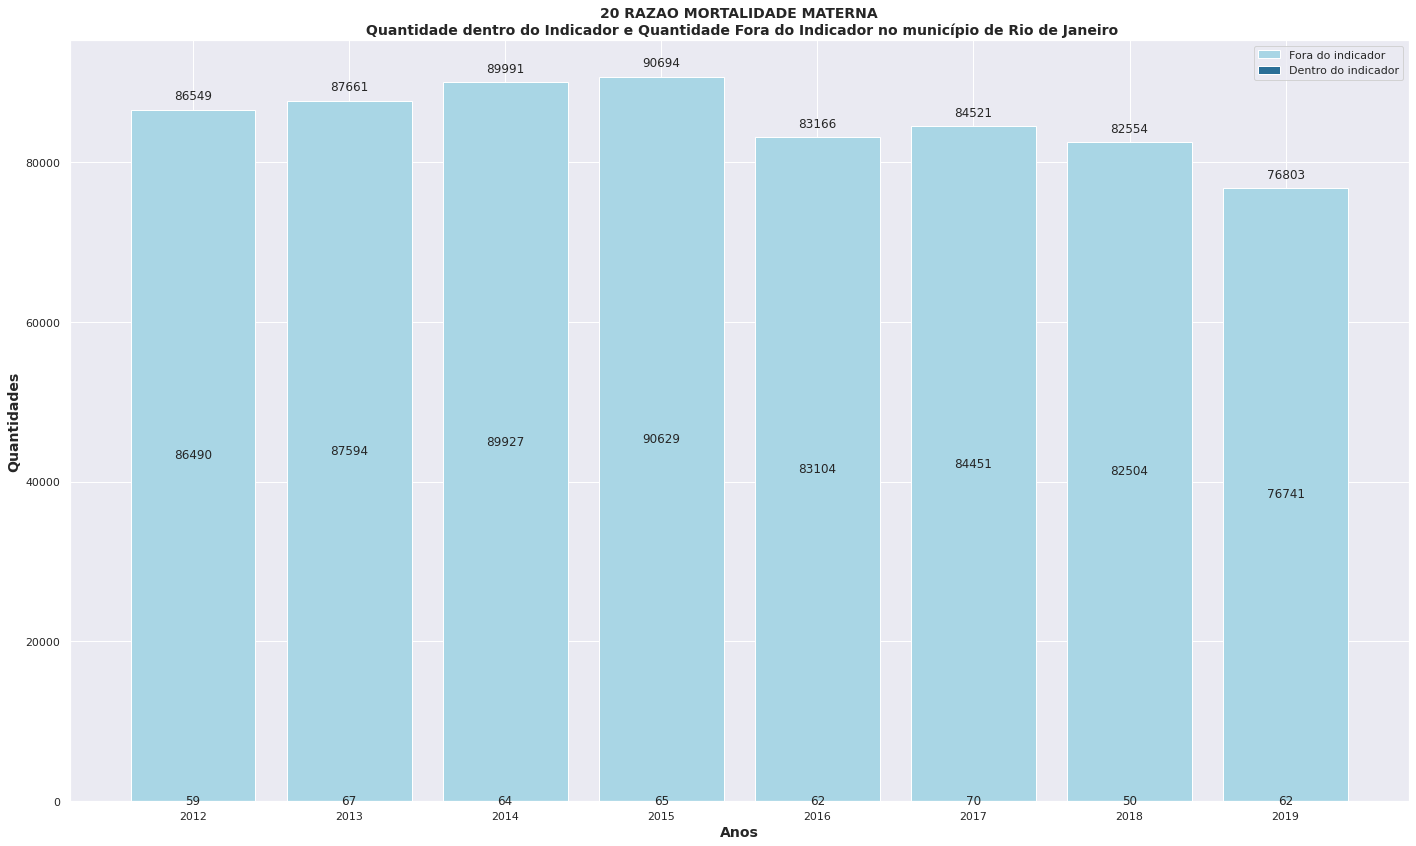

In [21]:
fig, ax = plt.subplots(figsize=(24, 14))

p1=ax.bar( subset_mun[ano], subset_mun[total] - subset_mun[indicador], bottom=subset_mun[indicador], color ='#a9d6e5', label = 'Fora do indicador')
p2=ax.bar( subset_mun[ano], subset_mun[indicador], color ='#2a6f97', label = 'Dentro do indicador')

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

plt.title(nome_indicador+ "\n Quantidade dentro do Indicador e Quantidade Fora do Indicador no município de "+nome_municipio,**font)
plt.xlabel('Anos',**font)
plt.ylabel('Quantidades',**font)

for i in range(8):
    height = int(p1[i].get_height() + p2[i].get_height())
    plt.text(p1[i].get_x() + p1[i].get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend()
plt.show()

In [22]:
subset_mun.head()

,CODMUNRES,Ano,Qtd_Morte_Materna,Qtd_Total,Ratio
26031,330455,2012,59.0,86549.0,68.169476
26032,330455,2013,67.0,87661.0,76.430796
26033,330455,2014,64.0,89991.0,71.118223
26034,330455,2015,65.0,90694.0,71.669570
26035,330455,2016,62.0,83166.0,74.549696


### Plot em Stacked Bar do município escolhido considerando as proporções

Aqui são plotadas as barras de Proporção dentro do Indicador e Proporção Fora do Indicador, o que permite visualizar a proporção para cada ano no município escolhido.

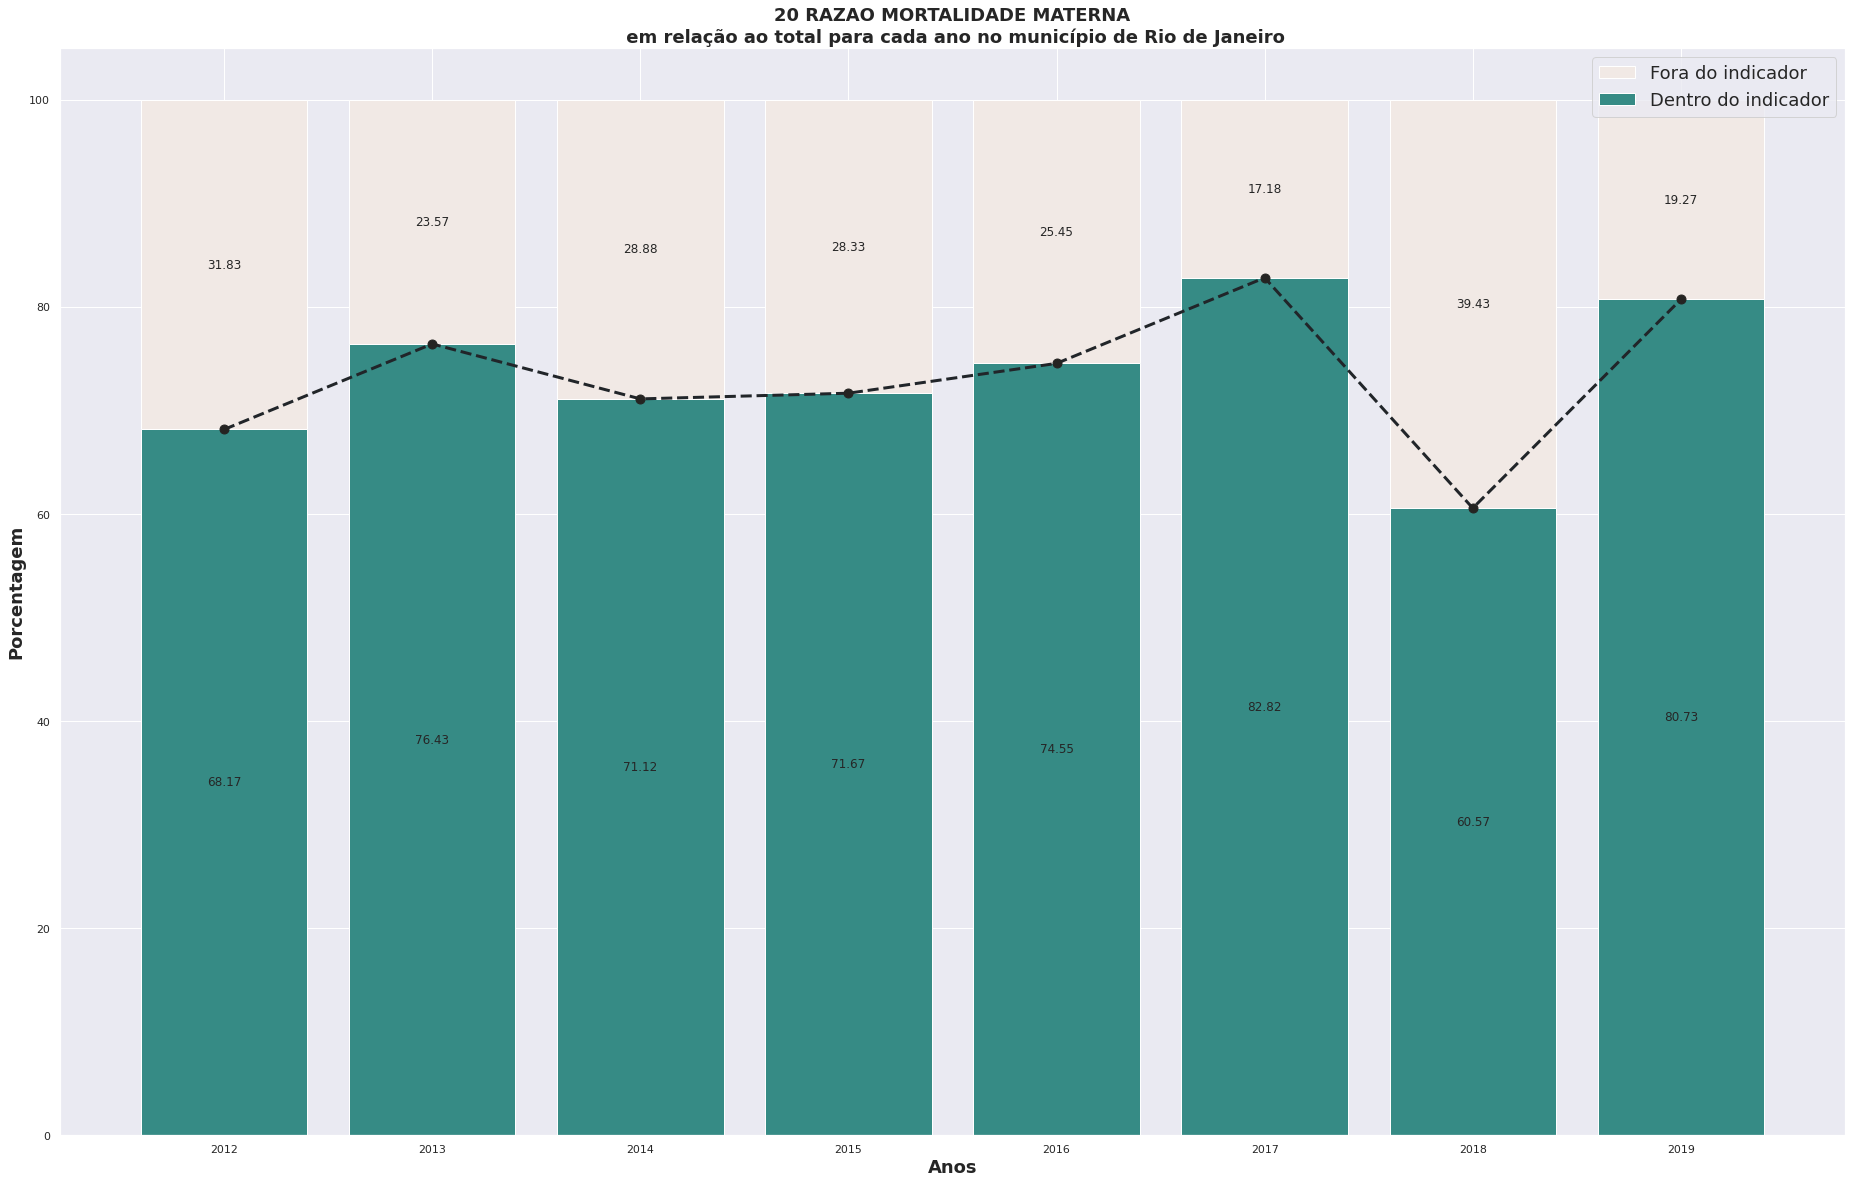

In [60]:
# Falta mostrar dentro desse gráfico a média Estadual, Regional e Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(subset_mun[ano], np.round(1*subset_mun[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(subset_mun[ano],  np.round(100 - 1*subset_mun[ratio], decimals=2) , bottom= np.round(1*subset_mun[ratio], decimals=2), color ='#F1E9E5', label = 'Fora do indicador')
p2 = ax.bar(subset_mun[ano],  np.round(1*subset_mun[ratio], decimals=2), color ='#368B85', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no município de " + nome_municipio, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

if(subset_mun[total].mean()<100):
    plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('../Imagens/10-grafico1', bbox_inches='tight')
plt.show()

### Plot em Stacked Bar do estado que o município escolhido pertence considerando as proporções

Aqui serão calculadas os números acumulados de registros em relação a estado e país para cada ano, para que depois possam ser analisadas as proporções. Essa célula pode ser necessária antes, visto que precisamos mostrar tanto o quartil que o estado se encontra em relação ao país, quanto o quartil que um município em específico de encontra em relação ao estado.

In [25]:
subset_nao_ignorado = subset_nao_ignorado.astype({coluna_codigo: str})
subset_nao_ignorado[ano] =       subset_nao_ignorado[ano].astype(int)
subset_nao_ignorado[indicador] = subset_nao_ignorado[indicador].astype(int)
subset_nao_ignorado[total] =     subset_nao_ignorado[total].astype(int)

f2d = subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{2})', expand=False)
df_grouped_by_state = subset_nao_ignorado.groupby([f2d, ano], as_index=True).agg({indicador:'sum', total:'sum'})
df_grouped_by_state.reset_index(inplace=True)
df_grouped_by_state.rename(columns = {coluna_codigo:'COD_UF'}, inplace = True)
df_grouped_by_state[ratio] = df_grouped_by_state[indicador]/df_grouped_by_state[total]
df_grouped_by_state['COD_UF'] = df_grouped_by_state['COD_UF'].astype(int)

numero_municipios_estado = int(droped_duplicates['res_MUNNOME'].shape[0])

df_estado_acumulado = df_grouped_by_state[df_grouped_by_state['COD_UF']==cod_estado]

print(numero_municipios_estado, 'Municípios com mais de 100 registros no estado',nome_estado,'para o indicador',nome_indicador,'\n')
print(df_estado_acumulado)

92 Municípios com mais de 100 registros no estado RIO DE JANEIRO para o indicador 20 RAZAO MORTALIDADE MATERNA 

     COD_UF   Ano  Qtd_Morte_Materna  Qtd_Total     Ratio
144      33  2012                179     222837  0.000803
145      33  2013                178     224008  0.000795
146      33  2014                166     233569  0.000711
147      33  2015                159     236946  0.000671
148      33  2016                156     219124  0.000712
149      33  2017                171     223216  0.000766
150      33  2018                136     220481  0.000617
151      33  2019                155     207966  0.000745


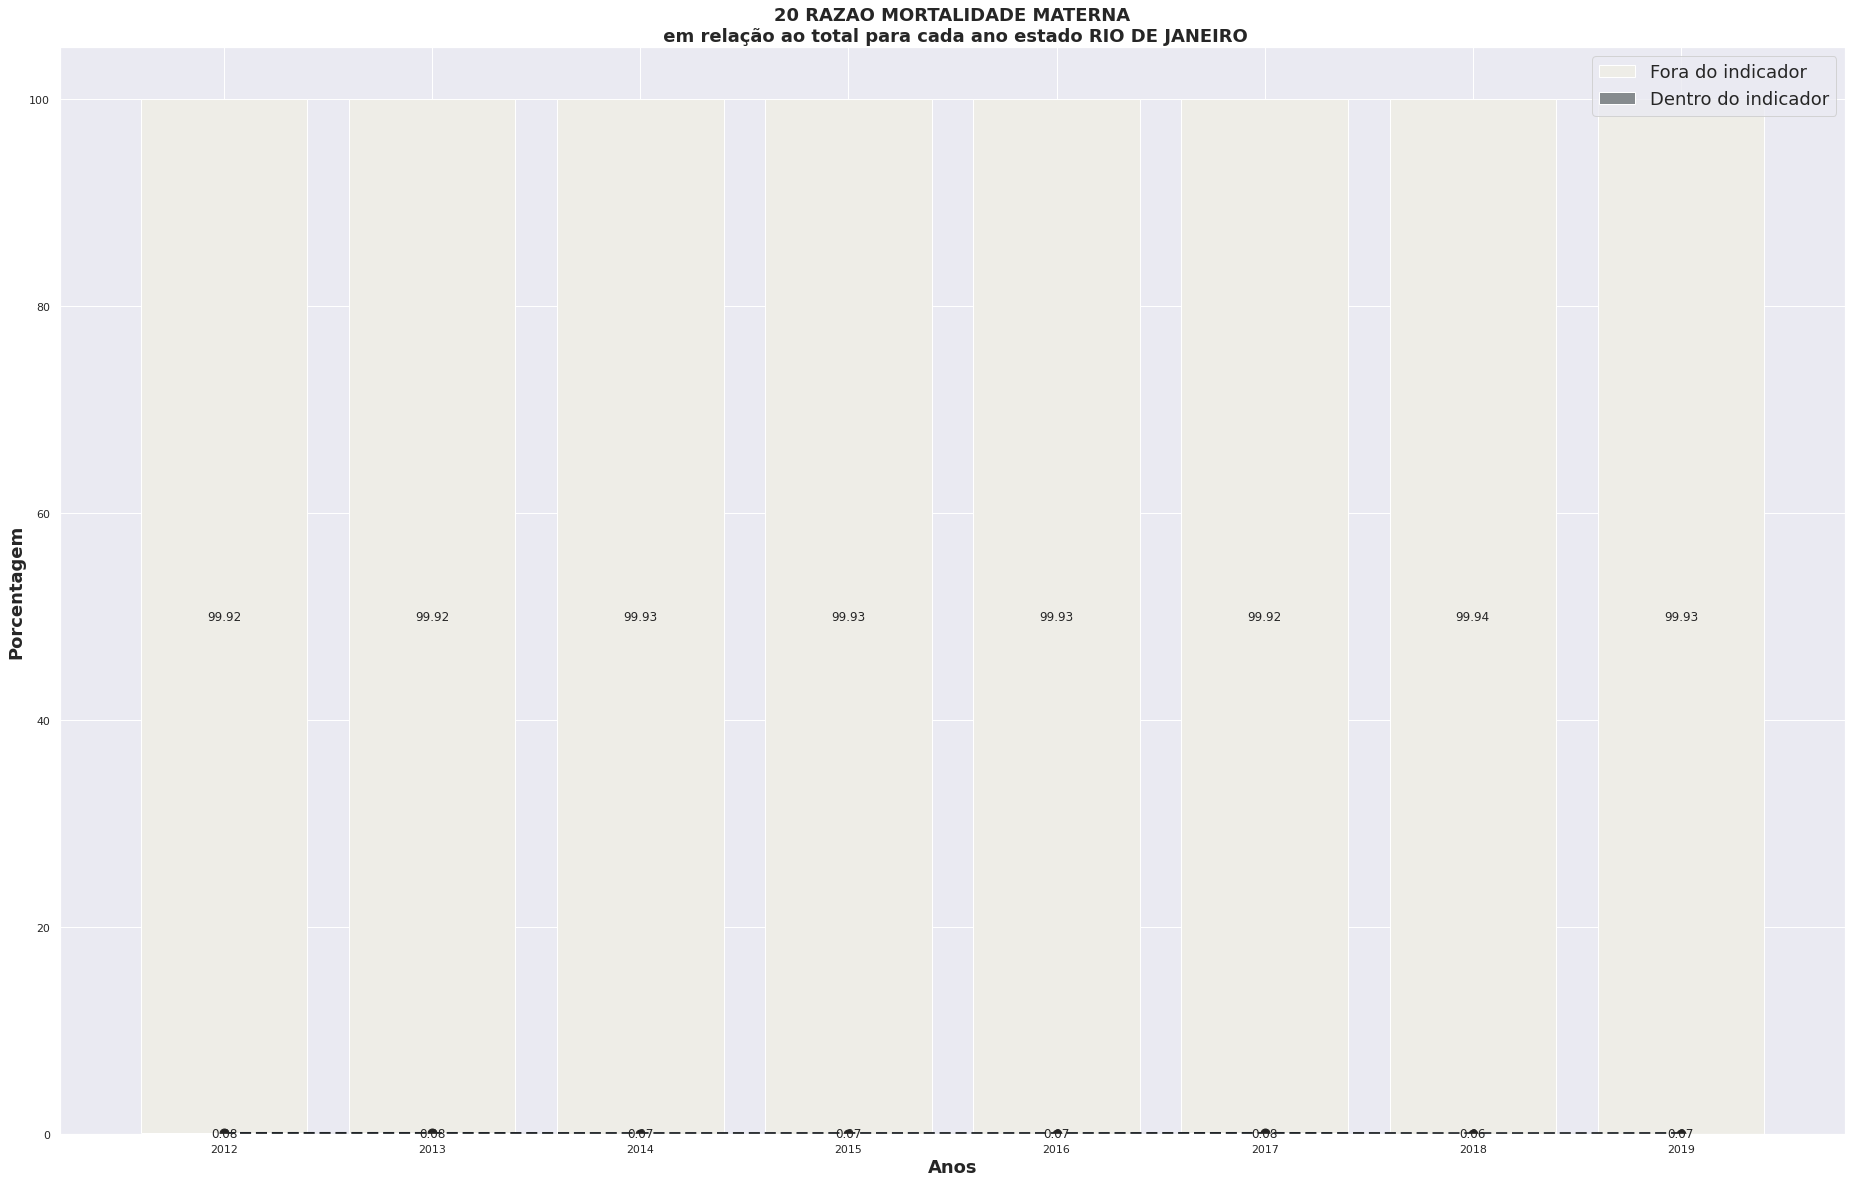

In [27]:
# Falta mostrar dentro desse gráfico a média Regional e Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(df_estado_acumulado[ano], np.round(100*df_estado_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(df_estado_acumulado[ano],  np.round(100 - 100*df_estado_acumulado[ratio], decimals=2) , bottom= np.round(100*df_estado_acumulado[ratio], decimals=2), color ='#EEEDE7', label = 'Fora do indicador')
p2 = ax.bar(df_estado_acumulado[ano],  np.round(100*df_estado_acumulado[ratio], decimals=2), color ='#868B8E', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano estado " + nome_estado, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )
plt.savefig('../Imagens/10-grafico2', bbox_inches='tight')
plt.show()

### Plot em Stacked Bar da região que o município escolhido pertence considerando as proporções

In [29]:
norte =         subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '1') ]
nordeste =      subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '2') ]
sudeste =       subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '3') ]
sul =           subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '4') ]
centro_oeste =  subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '5') ]

print(sudeste)
sudeste.to_csv('../csv_files/37-sudeste.csv',index=False)

      CODMUNRES   Ano  Qtd_Morte_Materna  Qtd_Total  Ratio
18035    310010  2012                  0         68    0.0
18036    310010  2013                  0         57    0.0
18037    310010  2014                  0         71    0.0
18038    310010  2015                  0         53    0.0
18039    310010  2016                  0         59    0.0
...         ...   ...                ...        ...    ...
31394    355730  2015                  0        147    0.0
31395    355730  2016                  0        137    0.0
31396    355730  2017                  0        127    0.0
31397    355730  2018                  0        137    0.0
31398    355730  2019                  0        145    0.0

[13344 rows x 5 columns]


In [30]:
def acumula(dataframe):
    anos = np.array(dataframe[ano][:8]).astype(int)

    soma_anos_total = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_total[i] = dataframe.loc[dataframe[ano]==anos[i], total ].sum()

    soma_anos_indicador = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_indicador[i] = dataframe.loc[dataframe[ano]==anos[i], indicador ].sum()

    list_of_tuples = list(zip(anos,soma_anos_indicador, soma_anos_total, np.round(soma_anos_indicador/soma_anos_total,4)))
    acumulado = pd.DataFrame(list_of_tuples,columns=[ano,indicador,total,ratio])
    
    return acumulado

In [31]:
norte_acumulado = acumula(norte)
#norte_acumulado.insert(loc=0,column='CODREGIAO',value=[1,1,1,1,1,1,1,1])
norte_acumulado.insert(loc=0,column='NOMEREGIAO',value='Norte')

nordeste_acumulado = acumula(nordeste)
#nordeste_acumulado.insert(loc=0,column='CODREGIAO',value=[2,2,2,2,2,2,2,2])
nordeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Nordeste')

sudeste_acumulado = acumula(sudeste)
#sudeste_acumulado.insert(loc=0,column='CODREGIAO',value=[3,3,3,3,3,3,3,3])
sudeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Sudeste')


sul_acumulado = acumula(sul)
#sul_acumulado.insert(loc=0,column='CODREGIAO',value=[4,4,4,4,4,4,4,4])
sul_acumulado.insert(loc=0,column='NOMEREGIAO',value='Sul')


centro_oeste_acumulado = acumula(centro_oeste)
#centro_oeste_acumulado.insert(loc=0,column='CODREGIAO',value=[5,5,5,5,5,5,5,5])
centro_oeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Centro Oeste')


print(sudeste_acumulado)
print('\n',sul_acumulado)
print('\n',centro_oeste_acumulado)
print('\n',nordeste_acumulado)
print('\n',norte_acumulado)

  NOMEREGIAO   Ano  Qtd_Morte_Materna  Qtd_Total   Ratio
0    Sudeste  2012                527    1152791  0.0005
1    Sudeste  2013                567    1147576  0.0005
2    Sudeste  2014                610    1182913  0.0005
3    Sudeste  2015                630    1196195  0.0005
4    Sudeste  2016                603    1127473  0.0005
5    Sudeste  2017                670    1151817  0.0006
6    Sudeste  2018                605    1146980  0.0005
7    Sudeste  2019                581    1102964  0.0005

   NOMEREGIAO   Ano  Qtd_Morte_Materna  Qtd_Total   Ratio
0        Sul  2012                183     381658  0.0005
1        Sul  2013                135     386978  0.0003
2        Sul  2014                149     396460  0.0004
3        Sul  2015                166     406526  0.0004
4        Sul  2016                157     391789  0.0004
5        Sul  2017                143     397595  0.0004
6        Sul  2018                146     395857  0.0004
7        Sul  2019           

In [32]:
df_brasil_regiao = norte_acumulado.append(nordeste_acumulado).append(sudeste_acumulado).append(sul_acumulado).append(centro_oeste_acumulado)
df_brasil_regiao

,NOMEREGIAO,Ano,Qtd_Morte_Materna,Qtd_Total,Ratio
0,Norte,2012,193,308353,0.0006
1,Norte,2013,231,313216,0.0007
2,Norte,2014,252,321641,0.0008
3,Norte,2015,214,320890,0.0007
4,Norte,2016,223,307495,0.0007
5,Norte,2017,240,312660,0.0008
6,Norte,2018,230,319199,0.0007
7,Norte,2019,233,313678,0.0007
0,Nordeste,2012,546,832606,0.0007
1,Nordeste,2013,614,821427,0.0007


In [33]:
cod_aux = str(subset_mun[coluna_codigo].iloc[0])[:1]

if (cod_aux == '1'):
    nome_regiao = 'Norte'
    regiao = norte
    regiao_acumulada = norte_acumulado
elif (cod_aux == '2'):
    nome_regiao = 'Nordeste'
    regiao = nordeste
    regiao_acumulada = nordeste_acumulado
elif (cod_aux == '3'):
    nome_regiao = 'Sudeste'
    regiao = sudeste
    regiao_acumulada = sudeste_acumulado
elif (cod_aux == '4'):
    nome_regiao = 'Sul'
    regiao = sul
    regiao_acumulada = sul_acumulado
elif (cod_aux == '5'):
    nome_regiao = 'Centro Oeste'
    regiao = centro_oeste
    regiao_acumulada = centro_oeste_acumulado
    
print(nome_regiao)
print(regiao)

Sudeste
      CODMUNRES   Ano  Qtd_Morte_Materna  Qtd_Total  Ratio
18035    310010  2012                  0         68    0.0
18036    310010  2013                  0         57    0.0
18037    310010  2014                  0         71    0.0
18038    310010  2015                  0         53    0.0
18039    310010  2016                  0         59    0.0
...         ...   ...                ...        ...    ...
31394    355730  2015                  0        147    0.0
31395    355730  2016                  0        137    0.0
31396    355730  2017                  0        127    0.0
31397    355730  2018                  0        137    0.0
31398    355730  2019                  0        145    0.0

[13344 rows x 5 columns]


In [34]:
regiao_acumulada[ano]

0    2012
1    2013
2    2014
3    2015
4    2016
5    2017
6    2018
7    2019
Name: Ano, dtype: int64

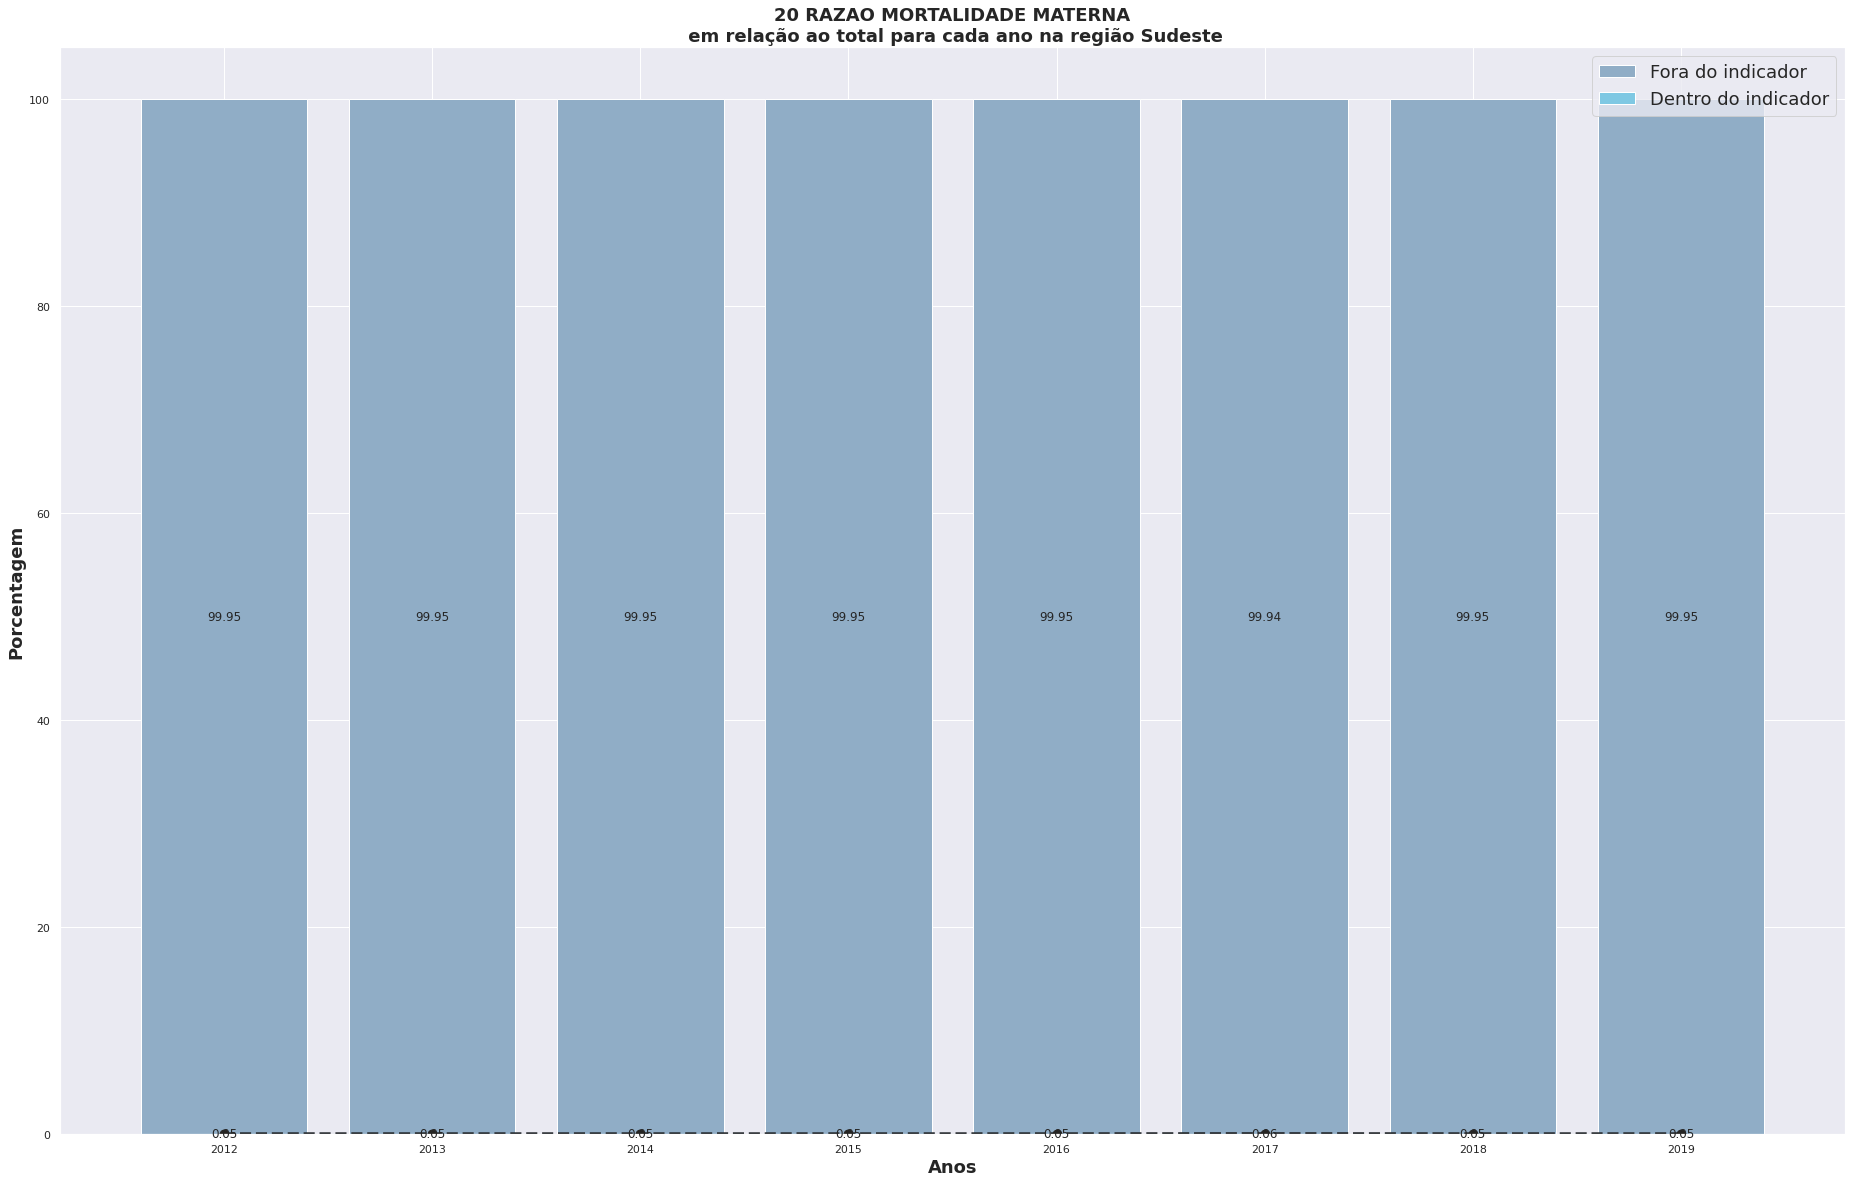

In [36]:
# Falta mostrar dentro desse gráfico a média Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(regiao_acumulada[ano], np.round(100*regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(regiao_acumulada[ano],  np.round(100 - 100*regiao_acumulada[ratio], decimals=2) , bottom= np.round(100*regiao_acumulada[ratio], decimals=2), color ='#90ADC6', label = 'Fora do indicador')
p2 = ax.bar(regiao_acumulada[ano],  np.round(100*regiao_acumulada[ratio], decimals=2), color ='#7EC8E3', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano na região " + nome_regiao, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('../Imagens/10-grafico3', bbox_inches='tight')
plt.show()

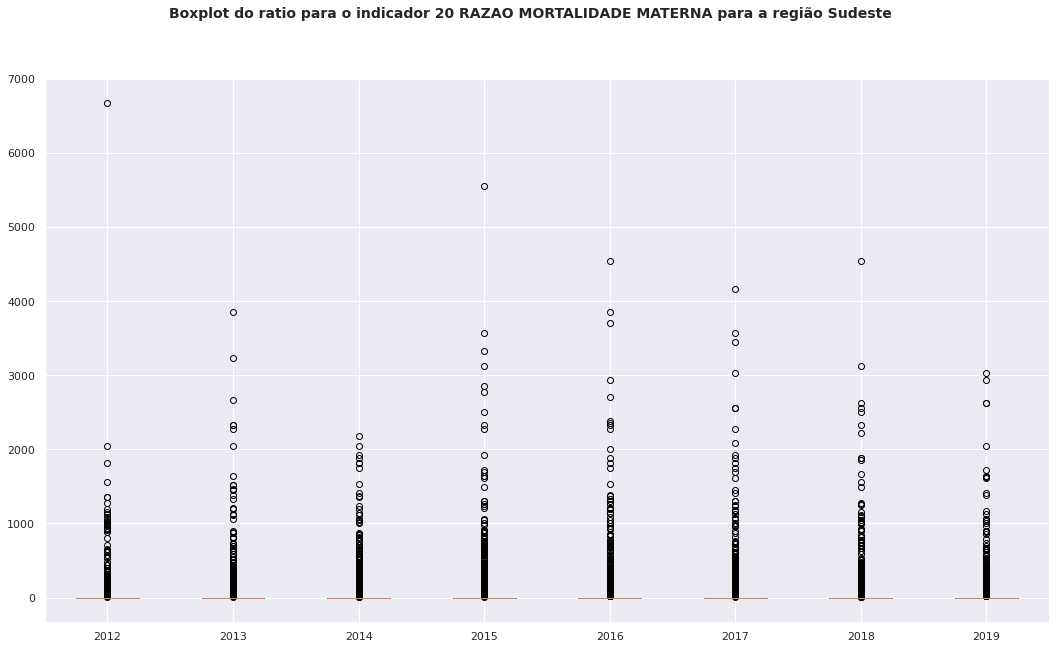

In [37]:
data_to_plot = [regiao[regiao[ano]==2012][ratio], regiao[regiao[ano]==2013][ratio],
                regiao[regiao[ano]==2014][ratio], regiao[regiao[ano]==2015][ratio],
                regiao[regiao[ano]==2016][ratio], regiao[regiao[ano]==2017][ratio],
                regiao[regiao[ano]==2018][ratio], regiao[regiao[ano]==2019][ratio]]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Boxplot do ratio para o indicador ' + nome_indicador + ' para a região ' + nome_regiao , fontsize=14, fontweight='bold')

box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4, 5, 6, 7, 8],
                  labels=['2012','2013','2014','2015','2016','2017','2018','2019'])

## Gráficos por estado 

### Cálculo do acumulado para cada estado e país

In [38]:
# Dataframe dos municipios do estado escolhido
df_estado_municipios = subset_nao_ignorado.loc[ subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{2})', expand=False) == str(cod_estado) ] 
print(df_estado_municipios)

      CODMUNRES   Ano  Qtd_Morte_Materna  Qtd_Total       Ratio
25495    330010  2012                  3       2698  111.193477
25496    330010  2013                  4       2653  150.772710
25497    330010  2014                  1       2838   35.236082
25498    330010  2015                  0       2872    0.000000
25499    330010  2016                  0       2628    0.000000
...         ...   ...                ...        ...         ...
26226    330630  2015                  1       3439   29.078220
26227    330630  2016                  1       3364   29.726516
26228    330630  2017                  1       3272   30.562347
26229    330630  2018                  0       3376    0.000000
26230    330630  2019                  2       3096   64.599483

[736 rows x 5 columns]


In [39]:
df_brasil_acumulado = acumula(subset_nao_ignorado)
print(df_brasil_acumulado)

    Ano  Qtd_Morte_Materna  Qtd_Total   Ratio
0  2012               1580    2905676  0.0005
1  2013               1680    2903867  0.0006
2  2014               1737    2979133  0.0006
3  2015               1737    3017563  0.0006
4  2016               1667    2857704  0.0006
5  2017               1717    2923441  0.0006
6  2018               1656    2944826  0.0006
7  2019               1574    2849064  0.0006


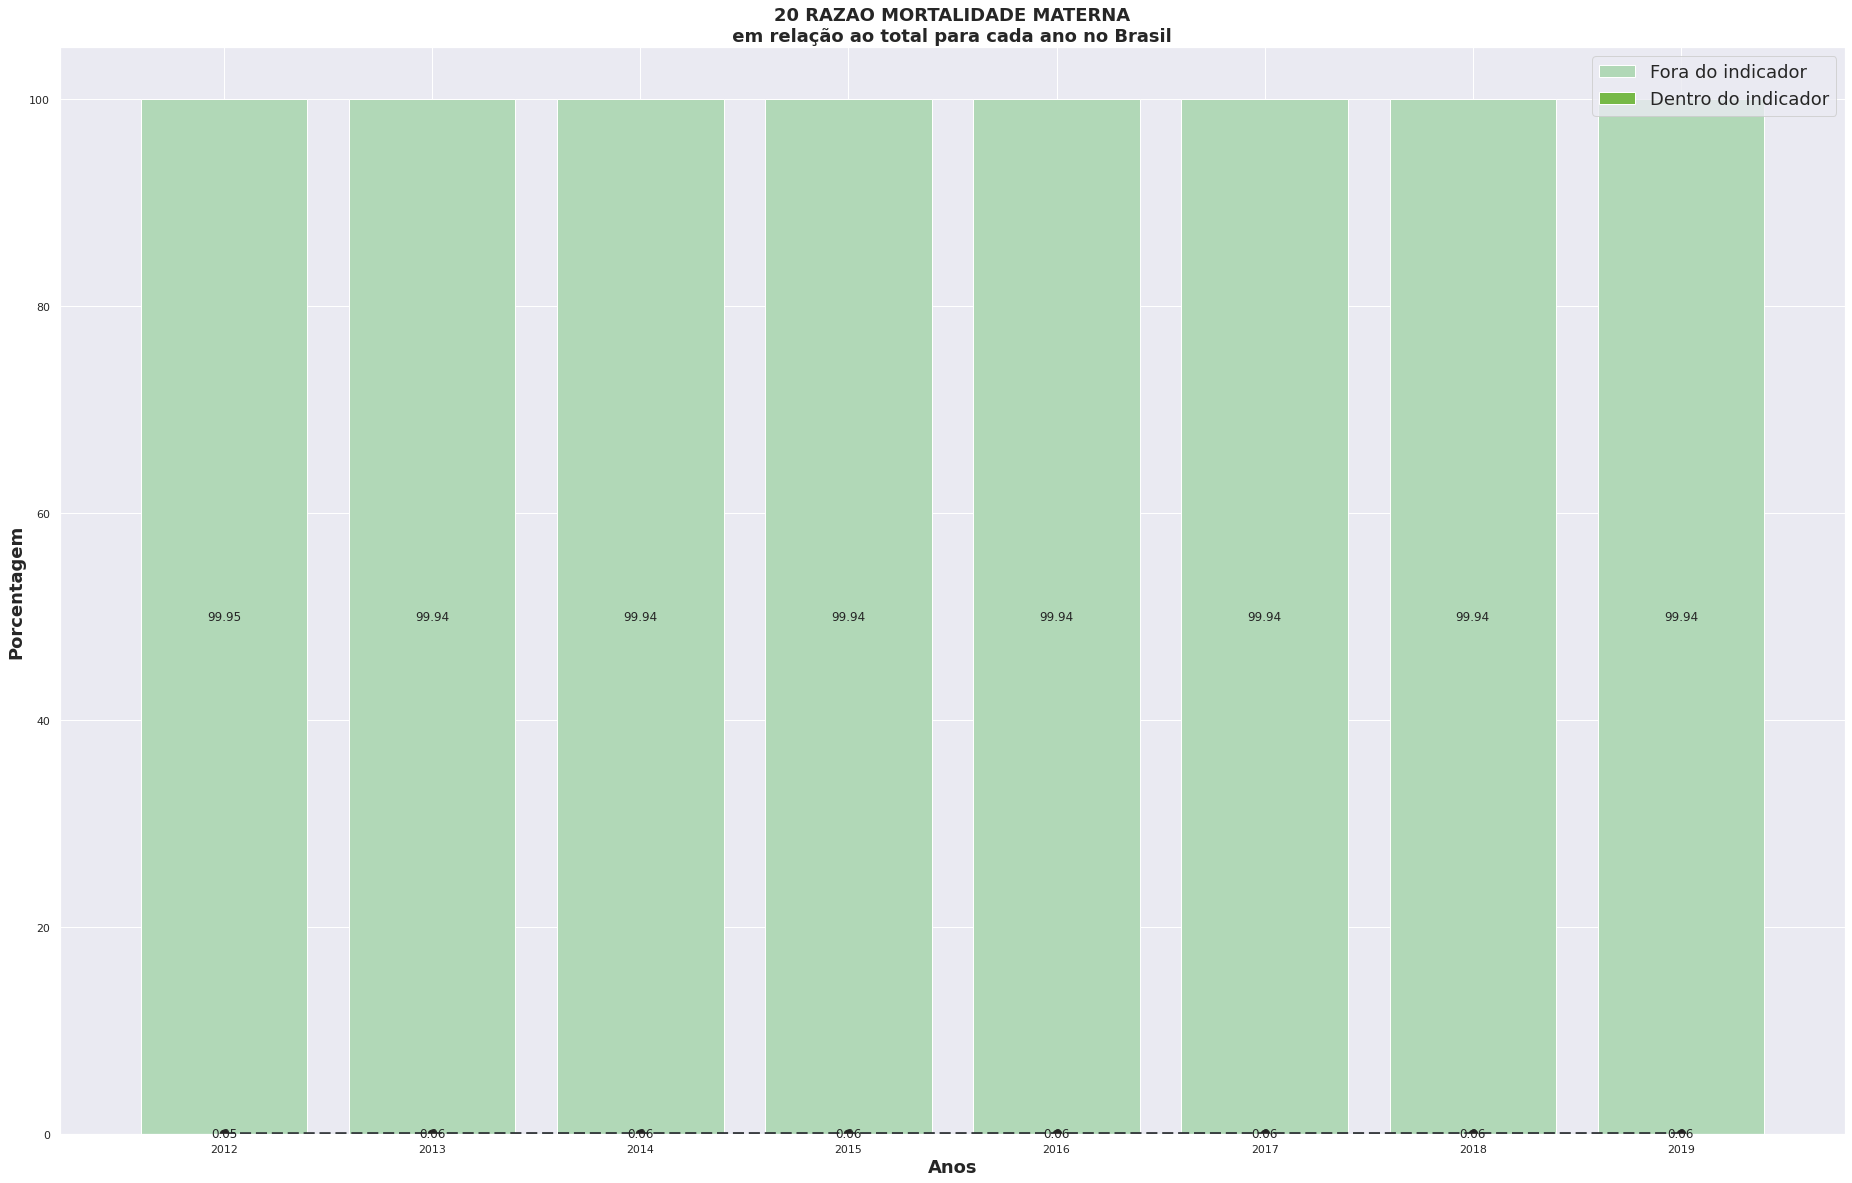

In [40]:
fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(df_brasil_acumulado[ano], np.round(100*df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(df_brasil_acumulado[ano],  np.round(100 - 100*df_brasil_acumulado[ratio], decimals=2) , bottom= np.round(100*df_brasil_acumulado[ratio], decimals=2), color ='#B1D8B7', label = 'Fora do indicador')
p2 = ax.bar(df_brasil_acumulado[ano],  np.round(100*df_brasil_acumulado[ratio], decimals=2), color ='#76B947', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no Brasil ", **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )
plt.savefig('../Imagens/10-grafico4', bbox_inches='tight')
plt.show()

In [41]:
df_brasil_por_estado = df_grouped_by_state
print(df_brasil_por_estado)

     COD_UF   Ano  Qtd_Morte_Materna  Qtd_Total     Ratio
0        11  2012                 17      26511  0.000641
1        11  2013                 18      27081  0.000665
2        11  2014                 22      27556  0.000798
3        11  2015                 14      27914  0.000502
4        11  2016                 15      26600  0.000564
..      ...   ...                ...        ...       ...
211      53  2015                 16      46122  0.000347
212      53  2016                 24      43340  0.000554
213      53  2017                 21      44568  0.000471
214      53  2018                 24      44195  0.000543
215      53  2019                  9      42422  0.000212

[216 rows x 5 columns]


### Gráfico do município mostrando também as médias Brasil Estadual e Regional para cada ano

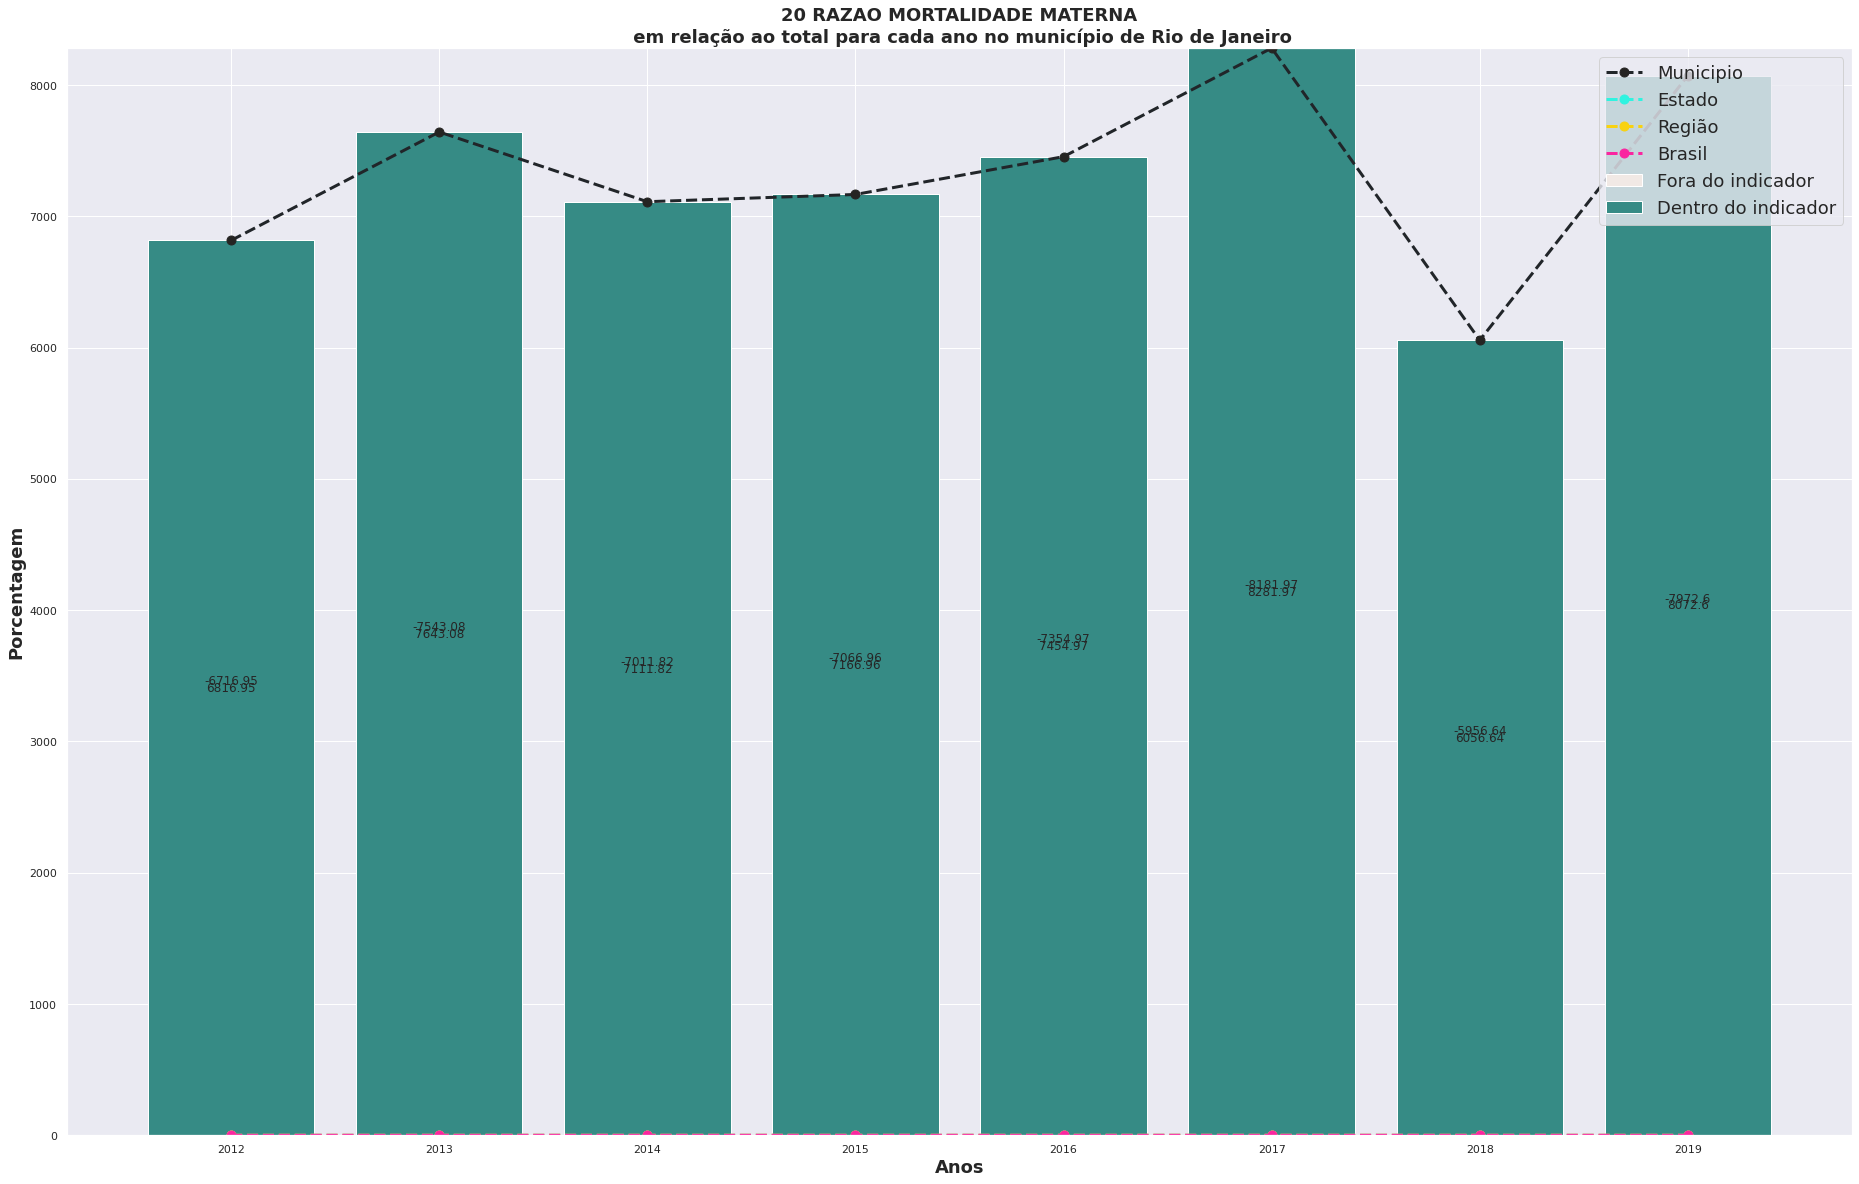

In [43]:
fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(subset_mun[ano], np.round(100*subset_mun[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529', label = 'Municipio' ) # Municipio
plt.plot(df_estado_acumulado[ano], np.round(100*df_estado_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#2FF3E0',mfc='#2FF3E0',linewidth=3,color='#2FF3E0' , label = 'Estado' ) # Estado
plt.plot(regiao_acumulada[ano], np.round(100*regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#F8D210',mfc='#F8D210',linewidth=3,color='#F8D210' , label = 'Região' ) # Região
plt.plot(df_brasil_acumulado[ano], np.round(100*df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#FA26A0',mfc='#FA26A0',linewidth=3,color='#FA26A0', label = 'Brasil'  ) # Brasil

plt.legend(loc='upper left', fontsize = 18 )

p1 = ax.bar(subset_mun[ano],  np.round(100 - 100*subset_mun[ratio], decimals=2) , bottom= np.round(100*subset_mun[ratio], decimals=2), color ='#F1E9E5', label = 'Fora do indicador')
p2 = ax.bar(subset_mun[ano],  np.round(100*subset_mun[ratio], decimals=2), color ='#368B85', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no município de " + nome_municipio, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

if(subset_mun[total].mean()<100):
    plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('../Imagens/10-grafico5', bbox_inches='tight')
plt.show()

### Boxplot de todos os municípios de um estado em cada ano, lado a lado

Escolhemos um indicador, então um gráfico contendo os boxplot de cada ano é gerado para um estado em específico, nesse gráfico também está contida a informação de qual é a média mediana do estado. Além de indicar em qual quartil o estado se encontra em relação ao país (vale revisar se essa informação deveria estar aqui)

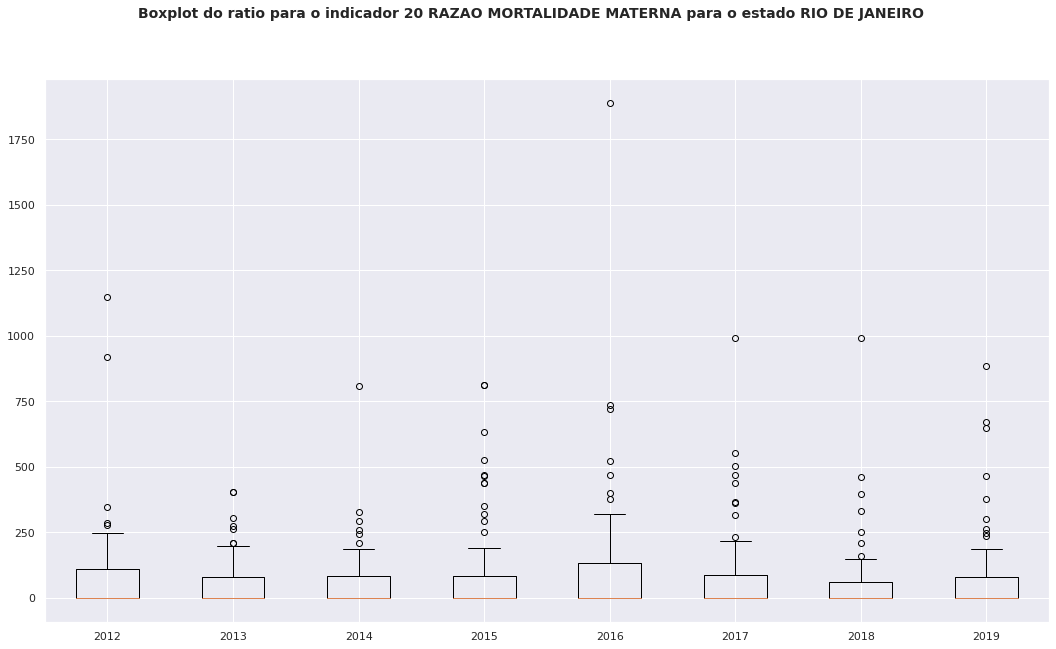

In [44]:
data_to_plot = [df_estado_municipios[df_estado_municipios[ano]==2012][ratio], df_estado_municipios[df_estado_municipios[ano]==2013][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2014][ratio], df_estado_municipios[df_estado_municipios[ano]==2015][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2016][ratio], df_estado_municipios[df_estado_municipios[ano]==2017][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2018][ratio], df_estado_municipios[df_estado_municipios[ano]==2019][ratio]]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Boxplot do ratio para o indicador ' + nome_indicador + ' para o estado ' + nome_estado , fontsize=14, fontweight='bold')

box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4, 5, 6, 7, 8],
                  labels=['2012','2013','2014','2015','2016','2017','2018','2019'])

### Gráfico em barras do acumulado de cada estado em um ano, com cada estado lado a lado

In [45]:
subset_ano = subset_nao_ignorado[ subset_nao_ignorado[ano] == ano_esc ]
subset_ano.head()

,CODMUNRES,Ano,Qtd_Morte_Materna,Qtd_Total,Ratio
8,110001,2013,0,382,0.000000
16,110002,2013,1,1654,60.459492
24,110003,2013,0,74,0.000000
32,110004,2013,0,1185,0.000000
40,110005,2013,0,271,0.000000


In [46]:
df_brasil_por_estado
df_brasil_por_estado_e_ano = df_brasil_por_estado[df_brasil_por_estado[ano]==ano_esc]
df_brasil_por_estado_e_ano.head(10)

,COD_UF,Ano,Qtd_Morte_Materna,Qtd_Total,Ratio
1,11,2013,18,27081,0.000665
9,12,2013,10,17075,0.000586
17,13,2013,50,79023,0.000633
25,14,2013,6,10806,0.000555
33,15,2013,119,139408,0.000854
41,16,2013,14,15709,0.000891
49,17,2013,14,24114,0.000581
57,21,2013,110,114996,0.000957
65,22,2013,43,46419,0.000926
73,23,2013,93,124874,0.000745


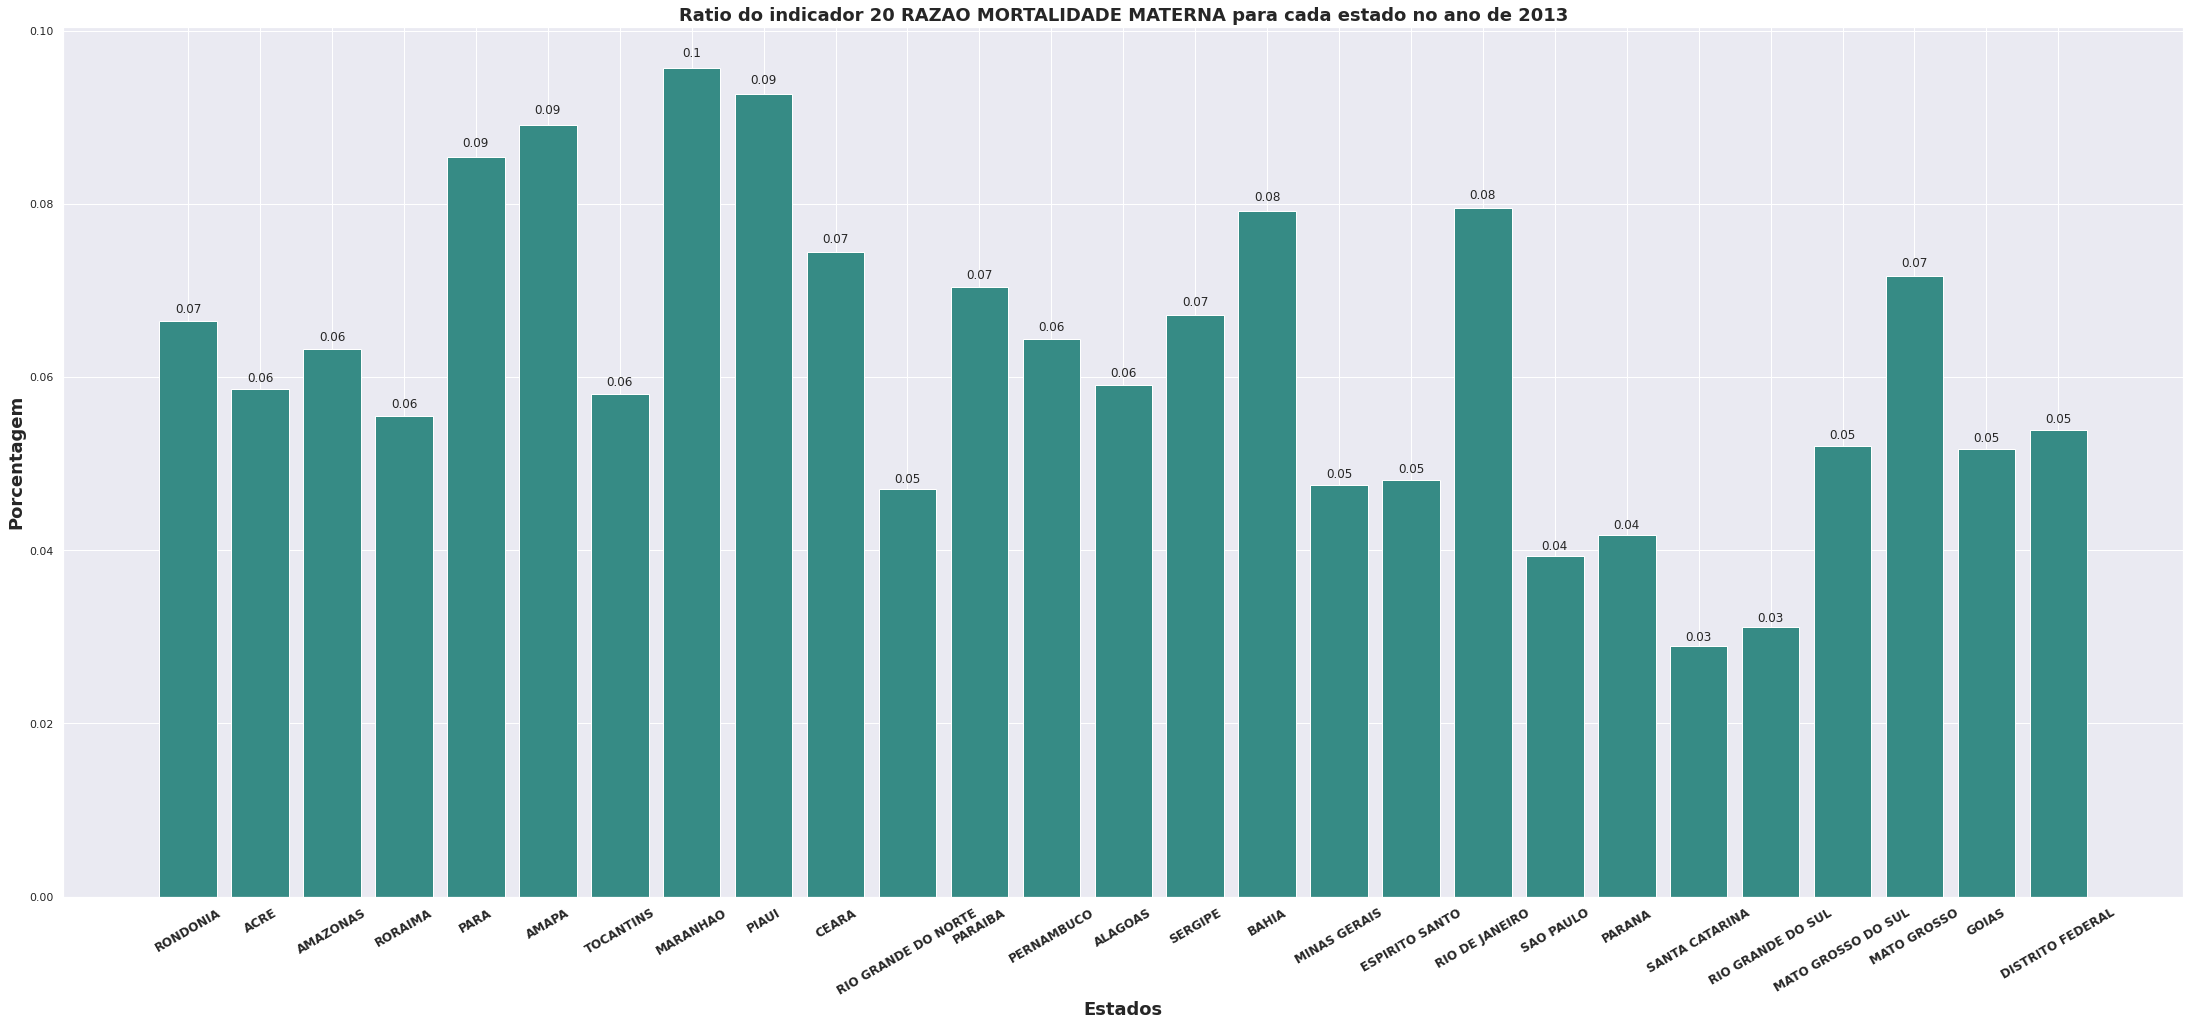

In [47]:
estados = df_estados['res_NOME_UF'].values

plt.figure(figsize=(38, 16))

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_label = {'family' : 'DejaVu Sans',
              'weight' : 'bold',
              'size'   : 12}


plt.title("Ratio do indicador " + nome_indicador +" para cada estado no ano de " + str(ano_esc),**font)
plt.xlabel('Estados',**font)
plt.ylabel('Porcentagem',**font)


#plt.bar(df_brasil_por_estado['COD_UF'],100*df_brasil_por_estado[df_brasil_por_estado[ano]==ano_esc]['ratio'], color ='#3458FF') #TODO
#plt.show()
estado_ = df_estados["res_NOME_UF"].values
merge1 = pd.merge(df_brasil_por_estado_e_ano, df_estados ,on=["COD_UF"])
#print(merge1.head(27))
y_pos = range(27)
grafico = plt.bar(merge1['res_NOME_UF'],100*merge1[ratio] , color ='#368B85')
for i in grafico:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

plt.xticks(y_pos, merge1['res_NOME_UF'], rotation=30,**font_label)

plt.savefig('../Imagens/10-grafico6', bbox_inches='tight')
plt.show()

### Gerar um gráfico semelhante ao acima, porém com as regiões lado a lado

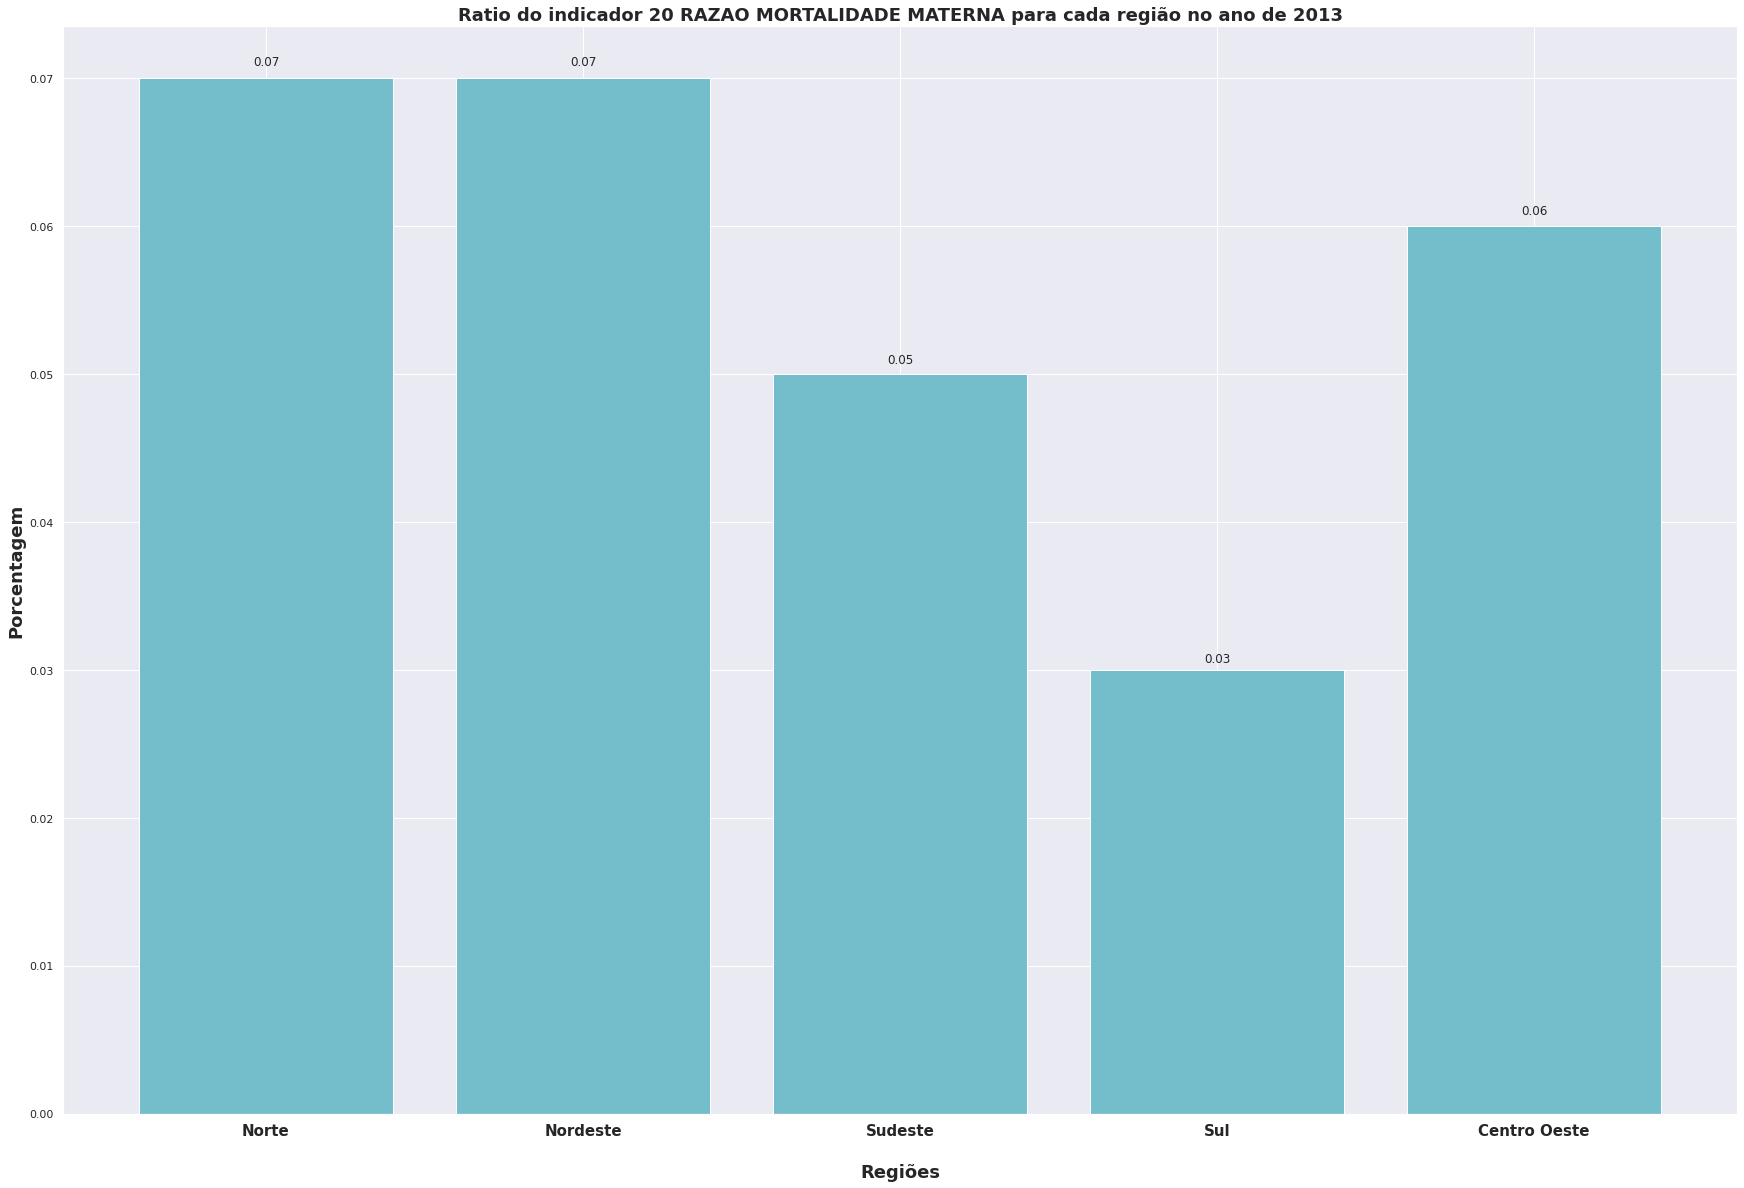

In [48]:
plt.figure(figsize=(30, 20))

aux = df_brasil_regiao[df_brasil_regiao[ano]==ano_esc]

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_label = {'family' : 'DejaVu Sans',
              'weight' : 'bold',
              'size'   : 15}


plt.title("Ratio do indicador " + nome_indicador +" para cada região no ano de " + str(ano_esc),**font)
plt.xlabel('\nRegiões',**font)
plt.ylabel('Porcentagem',**font)

y_pos = range(5)
grafico = plt.bar(aux['NOMEREGIAO'],100*aux[ratio] , color ='#74BDCB')
for i in grafico:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

plt.xticks(y_pos, aux['NOMEREGIAO'], rotation=0,**font_label)

plt.savefig('../Imagens/10-grafico7', bbox_inches='tight')
plt.show()

# Refazer as médias

In [49]:
#Mediana e quartil 
df_para_data_selecionada = df_brasil_por_estado[df_brasil_por_estado[ano] ==  ano_esc]

Media_total = df_para_data_selecionada[total].mean()
Mediana_total = df_para_data_selecionada[total].median()

#0.25 1st quartile(lower), 0.5 2nd quartile or median(mid), 0.75 3rd quartile(upper)
Quartil_total = df_para_data_selecionada[indicador].quantile([0.25,0.5,0.75])

Media_indicador = df_para_data_selecionada[indicador].mean()
Mediana_indicador = df_para_data_selecionada[indicador].median()

#0.25 1st quartile(lower), 0.5 2nd quartile or median(mid), 0.75 3rd quartile(upper)
Quartil_indicador = df_para_data_selecionada[indicador].quantile([0.25,0.5,0.75])

#print(df_brasil_por_estado)
print()
print("Media estadual do número total de registros feitos nesse ano (" ,ano_esc,"), no Brasil: ", float(Media_total))
print("Mediana do total de registros feitos nesse ano (" ,ano_esc,"), entre os estados do Brasil: ", float(Mediana_total))
print("Quartis do total de registros feitos nesse ano (" ,ano_esc,"), entre os estados do Brasil:\n",Quartil_total)
#------------------------------------------------
print()
print("Media estadual do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no Brasil: ", float(Media_indicador))
print("Mediana do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") entre os estados do Brasil: ", float(Mediana_indicador))
print("Quartis do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") entre os estados do Brasil:\n",Quartil_indicador)
print()
print('Dataframe agrupado por estado no ano de ',ano_esc,'\n')
print(df_para_data_selecionada)


Media estadual do número total de registros feitos nesse ano ( 2013 ), no Brasil:  107550.62962962964
Mediana do total de registros feitos nesse ano ( 2013 ), entre os estados do Brasil:  56854.0
Quartis do total de registros feitos nesse ano ( 2013 ), entre os estados do Brasil:
 0.25    22.5
0.50    40.0
0.75    92.0
Name: Qtd_Morte_Materna, dtype: float64

Media estadual do número de registros dentro do indicador 20 RAZAO MORTALIDADE MATERNA  feito nesse ano ( 2013 ) no Brasil:  62.22222222222222
Mediana do número de registros dentro do indicador 20 RAZAO MORTALIDADE MATERNA  feito nesse ano ( 2013 ) entre os estados do Brasil:  40.0
Quartis do número de registros dentro do indicador 20 RAZAO MORTALIDADE MATERNA  feito nesse ano ( 2013 ) entre os estados do Brasil:
 0.25    22.5
0.50    40.0
0.75    92.0
Name: Qtd_Morte_Materna, dtype: float64

Dataframe agrupado por estado no ano de  2013 

     COD_UF   Ano  Qtd_Morte_Materna  Qtd_Total     Ratio
1        11  2013                

In [50]:
#média de município do país inteiro: numero total de registros em um ano no brasil / numero total de municípios que foram contabilizados no pais
df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_total_mun_pais=df_aux[total]/numero_municipios_pais # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de total de registros feito nesse ano (", ano_esc, ") no Brasil: ", float(media_total_mun_pais))

df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_indicador_mun_pais=df_aux[indicador]/numero_municipios_pais # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no Brasil: ",  float(media_indicador_mun_pais))

NameError: name 'numero_municipios_pais' is not defined

In [51]:
#média de município do estado: numero total de registros em um ano no estado / numero total de municípios que foram contabilizados no estado
#média de município do país inteiro: numero total de registros em um ano no brasil / numero total de municípios que foram contabilizados no pais
df_aux=df_estado_acumulado[df_estado_acumulado[ano]==ano_esc]
media_total_mun_pais=df_aux[total]/numero_municipios_estado # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de total de registros feito nesse ano (", ano_esc, ") no estado", nome_estado, ": ", float(media_total_mun_pais))

df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_indicador_mun_pais=df_aux[indicador]/numero_municipios_estado # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no estado", nome_estado, ": ",  float(media_indicador_mun_pais))


Media municipal do número de total de registros feito nesse ano ( 2013 ) no estado RIO DE JANEIRO :  2434.8695652173915
Media municipal do número de registros dentro do indicador 20 RAZAO MORTALIDADE MATERNA  feito nesse ano ( 2013 ) no estado RIO DE JANEIRO :  18.26086956521739


In [304]:
# Médias regionais

## Describe por Estado

Dados do país inteiro considerando as proporções de cada estado (em todos os anos)

In [52]:
df_aux = df_brasil_por_estado[['COD_UF', 'Ratio']]
df_to_describe = df_aux.groupby(['COD_UF']).mean()
#df_to_describe.sort_values('Ratio',ascending=False)
aux = df_to_describe.describe()
df_to_describe['Ratio'].quantile([0.25,0.5,0.75])
aux

,Ratio
count,27.000000
mean,0.000600
std,0.000128
min,0.000320
25%,0.000553
50%,0.000595
75%,0.000661
max,0.000856


In [53]:
df_to_describe

,Ratio
COD_UF,
11,0.000587
12,0.000534
13,0.000741
14,0.000611
15,0.000790
16,0.000671
17,0.000624
21,0.000856
22,0.000830


## Describe por Município

Dados do país inteiro considerando as proporções de cada município (em todos os anos)

In [54]:
df_aux = subset_nao_ignorado[['CODMUNRES', 'Ratio']]
df_to_describe = df_aux.groupby(['CODMUNRES']).mean()
df_to_describe.describe()

,Ratio
count,5570.000000
mean,62.524658
std,95.249187
min,0.000000
25%,0.000000
50%,30.285682
75%,89.928058
max,1014.610390


## Describe No Estado

Dados do estado escolhido (Rio de Janeiro) considerando as proporções de cada município (em todos os anos)


In [55]:
df_aux = df_estado_municipios[['CODMUNRES', 'Ratio']]
df_to_describe = df_aux.groupby(['CODMUNRES']).mean()
descricao = df_to_describe.describe()
print(descricao)
print(descricao.at['25%','Ratio'])

#len_25 = len(df_estado_municipios[df_estado_municipios[ratio]<= ])

            Ratio
count   92.000000
mean    72.145963
std     62.112000
min      0.000000
25%     33.814409
50%     67.864596
75%     91.055356
max    337.475073
33.81440888812955


## Gráfico de Pizza para visualizar a proporção de municípios e estados em cada quartil (vamos ver os quartis do país e do estado) além de indicar em qual quartil o município e estado escolhido se encontram

In [57]:
# '330455'
df_to_describe

,Ratio
CODMUNRES,
330010,61.516125
330015,0.000000
330020,45.038729
330022,150.229605
330023,19.936204
...,...
330600,162.158584
330610,73.920983
330615,0.000000


In [58]:
df_estado_municipios

,CODMUNRES,Ano,Qtd_Morte_Materna,Qtd_Total,Ratio
25495,330010,2012,3,2698,111.193477
25496,330010,2013,4,2653,150.772710
25497,330010,2014,1,2838,35.236082
25498,330010,2015,0,2872,0.000000
25499,330010,2016,0,2628,0.000000
...,...,...,...,...,...
26226,330630,2015,1,3439,29.078220
26227,330630,2016,1,3364,29.726516
26228,330630,2017,1,3272,30.562347
26229,330630,2018,0,3376,0.000000


In [59]:
len_25 = len(df_to_describe[df_to_describe[ratio]<= descricao.at['25%','Ratio']])
len_50 = len(df_to_describe[df_to_describe[ratio]<= descricao.at['25%','Ratio']])
len_75 = len(df_to_describe[df_to_describe[ratio]>= descricao.at['75%','Ratio']])

len_75

23